In [1]:
import sys


sys.path.append("../src/")

In [2]:
from sennet.custom_modules.metrics.surface_dice_metric_fast import create_table_neighbour_code_to_surface_area
from sennet.custom_modules.metrics.surface_dice_metric import _NEIGHBOUR_CODE_TO_NORMALS
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
bases = np.array([
    [c == "1" for c in f"{i:08b}"[::-1]]
    # [c == "1" for c in f"{i:08b}"]
    for i in range(256)
])
bases.shape

(256, 8)

In [4]:
points = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
])[::-1]
lines = np.array([
    [0, 1],
    [0, 2],
    [1, 3],
    [2, 3],
    
    [4, 5],
    [4, 6],
    [5, 7],
    [6, 7],

    [0, 4],
    [1, 5],
    [2, 6],
    [3, 7],
])
print(points)
print(lines)

[[1 1 1]
 [0 1 1]
 [1 0 1]
 [0 0 1]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 0]]
[[0 1]
 [0 2]
 [1 3]
 [2 3]
 [4 5]
 [4 6]
 [5 7]
 [6 7]
 [0 4]
 [1 5]
 [2 6]
 [3 7]]


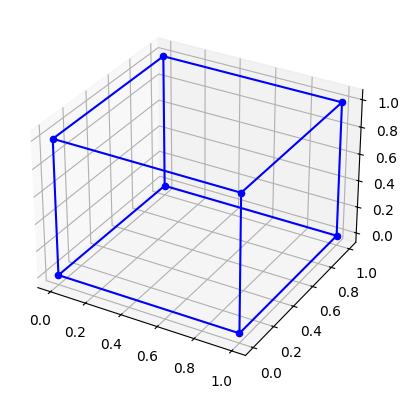

In [6]:
def draw_line(points, start_i, end_i, ax):
    ax.plot(
        [points[start_i, 0], points[end_i, 0]], 
        [points[start_i, 1], points[end_i, 1]],
        [points[start_i, 2], points[end_i, 2]],
        color="blue"
    )

def draw_point(points, i, ax, color="blue"):
    ax.scatter(points[i, 0], points[i, 1], points[i, 2], color=color)


def draw_cube(points, lines, ax):
    for i in range(8):
        draw_point(points, i, ax)

    for i, j in lines:
        draw_line(points, i, j, ax)


fig = plt.figure()
ax = fig.add_subplot(projection="3d")
draw_cube(points, lines, ax)

[1 0 1 0 1 0 0 0]
[[0.0, 0.0, -0.5], [0.25, 0.25, 0.25], [-0.125, -0.125, -0.125]]


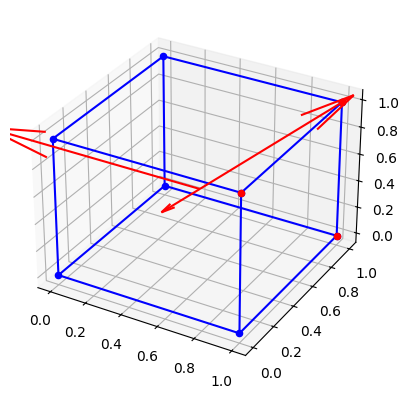

In [7]:
def draw_basis(
    points,
    lines,
    bases,
    basis_idx,
    ax,
):
    basis = bases[basis_idx]
    print(basis.astype(int))
    draw_cube(points, lines, ax)
    for i, b in enumerate(basis):
        if b:
            draw_point(points, i, ax, color="red")
    
    normals = _NEIGHBOUR_CODE_TO_NORMALS[basis_idx]
    print(normals)
    for n in normals:
        length = np.linalg.norm(n)
        ax.quiver(
            0.5, 0.5, 0.5, 
            # n[0], n[1], n[2], 
            n[2], n[1], n[0], 
            length=5*length, 
            normalize=False,
            color="red",
        )


fig = plt.figure()
ax = fig.add_subplot(projection="3d")
draw_basis(points, lines, bases, 21, ax)

[1 0 0 0 0 0 0 0]
[[0.125, 0.125, 0.125]]
[0 1 0 0 0 0 0 0]
[[-0.125, -0.125, 0.125]]
[0 0 1 0 0 0 0 0]
[[0.125, -0.125, 0.125]]
[0 0 0 1 0 0 0 0]
[[-0.125, 0.125, 0.125]]
[0 0 0 0 1 0 0 0]
[[0.125, -0.125, -0.125]]
[0 0 0 0 0 1 0 0]
[[0.125, -0.125, 0.125]]
[0 0 0 0 0 0 1 0]
[[-0.125, -0.125, 0.125]]
[0 0 0 0 0 0 0 1]
[[0.125, 0.125, 0.125]]


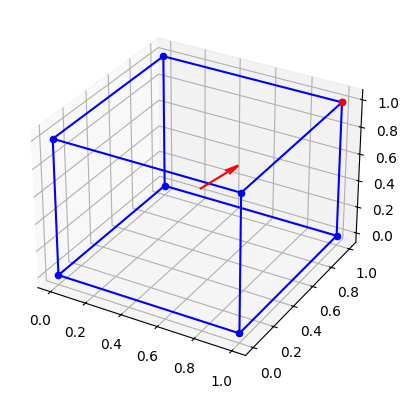

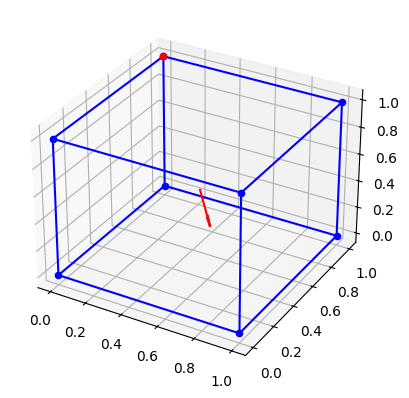

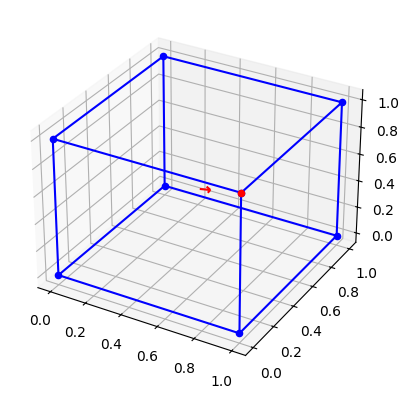

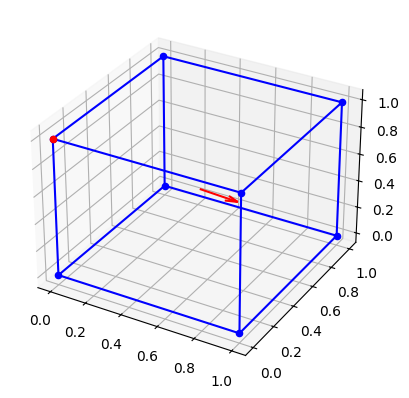

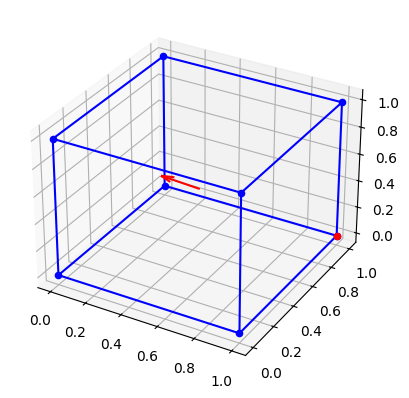

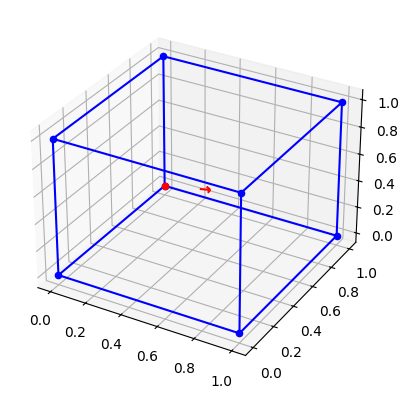

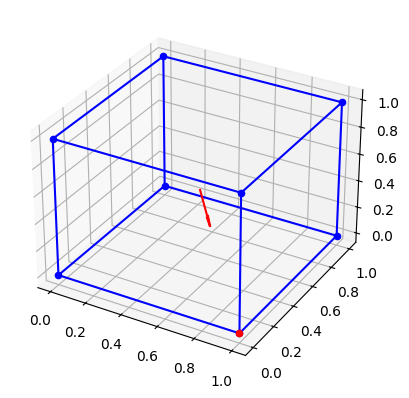

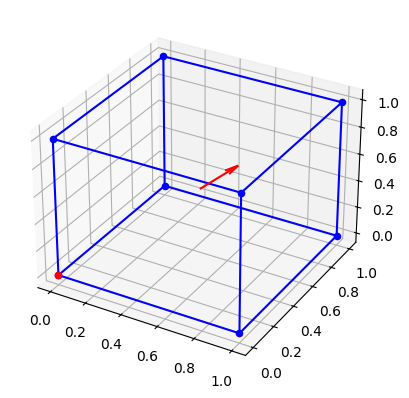

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
draw_basis(points, lines, bases, 1, ax)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
draw_basis(points, lines, bases, 2, ax)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
draw_basis(points, lines, bases, 4, ax)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
draw_basis(points, lines, bases, 8, ax)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
draw_basis(points, lines, bases, 16, ax)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
draw_basis(points, lines, bases, 32, ax)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
draw_basis(points, lines, bases, 64, ax)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
draw_basis(points, lines, bases, 128, ax)

In [9]:
from sennet.core.marching_cube_constants import *
import base64


def _to_array(args):
    shape, text = args
    byts = base64.decodebytes(text.encode('utf-8'))
    ar = np.frombuffer(byts, dtype='int8')
    ar.shape = shape
    return ar

ModuleNotFoundError: No module named 'sennet.core.marching_cube_constants'

In [ ]:
lut = _to_array(CASESCLASSIC)
lut.shape

In [ ]:
lut[0]

In [ ]:
lut[1]